**Import Library dan Packages yang Diperlukan**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import accuracy_score, mean_absolute_error

**Data Understanding**

Sumber Dataset: https://www.kaggle.com/code/saadatkhalid/consumer-electronics-sales-eda-model

In [ ]:
data = pd.read_csv('/content/consumer_electronics_sales_data.csv')

In [ ]:
data.head(10)

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0
5,5879,Smartphones,Samsung,373.148325,37,1,8,1,1
6,5880,Smartphones,Samsung,2330.036775,26,1,5,5,1
7,5881,Smartphones,HP,780.101494,35,0,12,5,1
8,5882,Laptops,Other Brands,2264.561583,19,1,3,4,1
9,5883,Laptops,HP,1001.624006,66,1,8,4,1


Menampilkan 10 baris pertama dari dataset dalam variabel data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


Menunjukkan gambaran umum atau ringkasan terkait struktur data yang digunakan. Dataset ini memiliki 9000 baris dan 9 kolom

In [ ]:
data.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


Menampilkan ringkasan statistik deskriptif mengenai data.

In [ ]:
data.isnull().sum()

,0
ProductID,0
ProductCategory,0
ProductBrand,0
ProductPrice,0
CustomerAge,0
CustomerGender,0
PurchaseFrequency,0
CustomerSatisfaction,0
PurchaseIntent,0


Mengecek jumlah *missing value* setiap kolom dari data yang digunakan. Dari output diatas, tidak ada *missing value* yang berarti data tersebut bersih.

In [ ]:
data.duplicated().sum()

0

Mengecek jumlah baris yang memiliki baris duplikat, dan terdeteksi 0 (tidak ada) data duplikat.

**Visualisasi Data**



In [ ]:
plt = px.histogram(data, x = 'ProductCategory',
                   title="Total Sales by Product Category",
                   color_discrete_sequence=['#789DBC'])
plt.show()

Visualisasi histogram untuk menampilkan distribusi penjualan berdasarkan kategori produk. Dari grafik diatas, terlihat bahwa penjualan produk:
1. Smartphones: 1841
2. Smart watches: 1810
3. Tablets: 1769
4. Laptops: 1842
5. Headphones: 1738

Dari hasil tersebut, sudah jelas bahwa penjualan terbanyak adalah produk **laptop**

In [ ]:
plt = px.histogram(data, x = 'ProductBrand',
                   title="Total Sales by Product Brand",
                   color_discrete_sequence=['#D91656'])
plt.show()

Visualisasi histogram diatas untuk menampilkan distribusi penjualan berdasarkan merk/brand produk. Dari grafik diatas, terlihat bahwa penjualan produk dengan merk:
1. Samsung: 1854
2. Sony: 1790
3. HP: 1820
4. Apple: 1760
5. Other brands: 1776

Dari hasil tersebut, sudah jelas bahwa penjualan terbanyak adalah produk dengan brand **Samsung**

In [ ]:
plt = px.histogram(data, x = 'CustomerAge',
                   title="Customer Age distribution",
                   color_discrete_sequence=['#384B70'])
plt.show()

Visualisasi diatas bertujuan untuk menampilkan usia pelanggan. Dari grafik tersebut, terlihat usia yang paling umum dalam kelompok pelanggan.

In [ ]:
plt = px.pie(data, names = 'CustomerGender',
             title="Customer Gender Distribution",
             color_discrete_sequence=['#F0A8D0', '#FFEBD4'])
plt.show()

Visualisasi diatas digunakan untuk melihat perbandingan, lebih banyak pria atau wanita yang melakukan pembelian. Dengan selisih yang tipis, pelanggan wanita mendominasi 50.9% dalam pembelian.

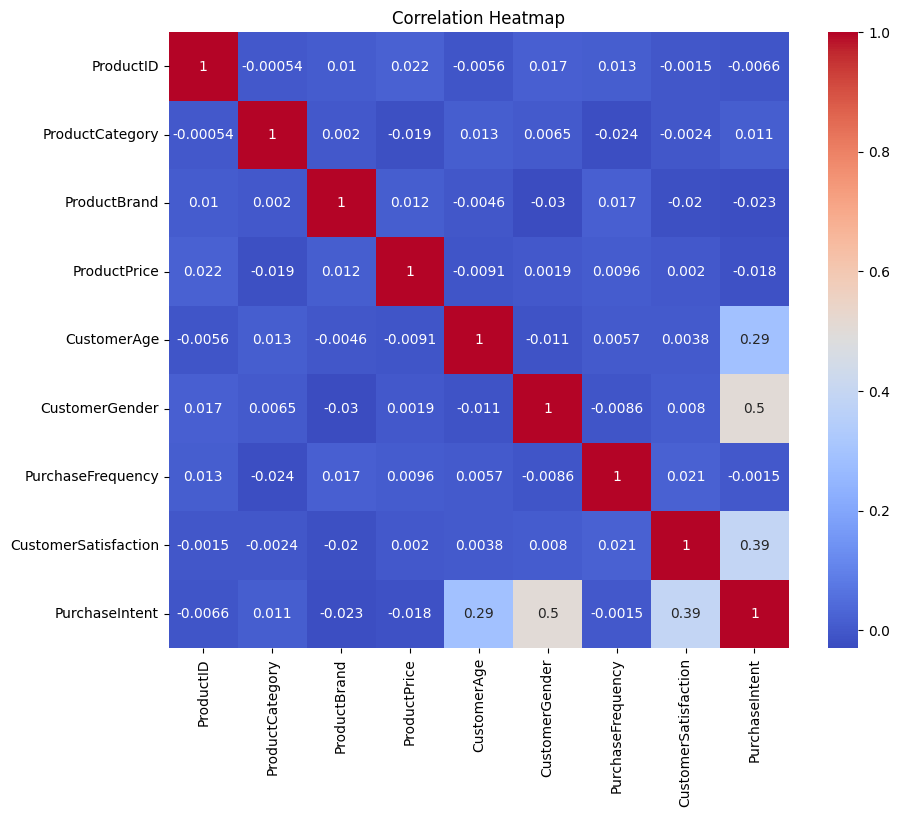

In [17]:
corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Proses ini menghitung dan memvisualisasikan matriks korelasi menggunakan heatmap, memberikan cara yang intuitif untuk menganalisis dan memahami hubungan antara variabel dalam dataset. Dari visualisasi tersebut, terlihat bahwa korelasi tertinggi terdapat antara kolom **CustomerGender** dan **PurchaseIntent**.

**Data Preparation**

In [18]:
data=data.drop(['ProductID'],axis=1)
data.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,3,2,663,18,0,2,1,0
1,2,3,2802,35,1,7,2,1
2,4,3,7850,63,0,1,5,1
3,3,3,2438,63,1,10,3,1
4,4,4,5368,57,0,17,3,0


Karena kolom "**ProductID**" tidak digunakan dalam proses pembuatan model, maka saya menghapus kolom tersebut.

In [ ]:
# Encoding categorical variables
le_category = LabelEncoder()
data['ProductCategory'] = le_category.fit_transform(data['ProductCategory'])

le_brand = LabelEncoder()
data['ProductBrand'] = le_brand.fit_transform(data['ProductBrand'])

le_price_range = LabelEncoder()
data['ProductPrice'] = le_price_range.fit_transform(data['ProductPrice'])

Tahapan ini merupakan proses mengubah (encoding) variabel kategori dalam sebuah dataset menjadi nilai numerik dengan menggunakan LabelEncoder. Hal ini dilakukan karena algoritma yang akan digunakan memerlukan data dalam format numerik. Melalui proses ini, data dalam kolom **ProductCategory, ProductBrand, dan ProductPrice** diubah menjadi nilai numerik dan dapat digunakan dalam permodelan.

In [19]:
data

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,3,2,663,18,0,2,1,0
1,2,3,2802,35,1,7,2,1
2,4,3,7850,63,0,1,5,1
3,3,3,2438,63,1,10,3,1
4,4,4,5368,57,0,17,3,0
...,...,...,...,...,...,...,...,...
8995,2,3,3001,36,1,16,4,0
8996,3,3,4417,57,0,5,1,1
8997,0,3,8680,28,0,18,4,0
8998,4,1,4428,38,0,4,2,1


Menampilkan data, terutama data setelah di encoding.

Split Data

In [20]:
X = data.drop(['PurchaseIntent'], axis=1)
y = data['PurchaseIntent']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pada tahapan ini, kolom **PurchaseIntent** di drop untuk memisahkan fitur dari target, sehingga model dapat dilatih menggunakan data yang relevan untuk membuat prediksi. Setelah itu membagi data menjadi set pelatihan dan pengujian. Hal tersebut dilakukan agar model dilatih dan dievaluasi secara efektif dan konsisten, sehingga model dapat menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

**Modeling**

1) Random Forest

In [32]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Train model dengan model terbaik
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

Code ini berfungsi untuk menginisialisasi dan melatih model Random Forest serta melakukan hyperparameter tuning untuk meningkatkan kinerja model.
* Menetapkan nilai 42 untuk random_state.
* Melatih model menggunakan data pelatihan yang telah disiapkan sebelumnya.
* Mengatur jumlah
        n_estimators: [100, 200]
        max_depth: [None, 10, 20]
        min_samples_split: [2, 5]
* Menentukan jumlah lipatan dalam validasi silang sebanyak 5 kali.
* Menyimpan model terbaik yang ditemukan disimpan dalam variabel **best_rf_model**.
* Setelah menemukan model terbaik dengan hyperparameter yang dioptimalkan, model dilatih dengan data pelatihan.



In [33]:
# Menampilkan parameter terbaik dari hasil GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [23]:
# prediksi performa model
y_pred_rf = best_rf_model.predict(X_test)

# akurasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

Accuracy: 0.95


Proses ini melakukan prediksi dan evaluasi untuk memastikan bahwa model yang dibangun berfungsi dengan baik dan memberikan hasil yang memuaskan ketika diterapkan pada data baru. Hasil **akurasi dari model Random Forest ini adalah  0.95 atau setara dengan 95%**.

2) Logistic Regression

In [24]:
log_reg = LogisticRegression(max_iter=1000)

# Menentukan parameter grid untuk hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Menggunakan GridSearchCV untuk menemukan hyperparameter terbaik
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_log_reg_model = grid_search.best_estimator_

# Train model dengan model terbaik
best_log_reg_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


LogisticRegression(C=1, max_iter=1000, solver='liblinear')

 Model regresi logistik diinisialisasi dengan parameter max_iter=1000, yang menentukan jumlah maksimum iterasi yang akan dilakukan selama proses pelatihan untuk menemukan koefisien model. Setelah itu, mengkombinasikan hyperparameter terbaik yang meningkatkan performa model Logistic Regression.
 *  C: [0.01, 0.1, 1, 10, 100]: Parameter yang mengontrol kekuatan regularisasi.
 *  penalty: ['l1', 'l2']: Menentukan jenis regularisasi yang akan diterapkan, yaitu L1 (lasso) atau L2 (ridge).
 *  solver: ['liblinear', 'saga']: Menentukan algoritma optimasi yang digunakan untuk menyelesaikan masalah regresi logistik.


 Proses ini juga menggunakan **GridSearchCV** agar proses tuning menjadi lebih sistematis dan dapat diulang.

In [31]:
# Menampilkan parameter terbaik dari hasil GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [25]:
# Prediksi dan evaluasi performa model
y_pred_log = best_log_reg_model.predict(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy_log:.2f}')

Accuracy: 0.85


Proses ini melakukan prediksi dan evaluasi untuk memastikan bahwa model yang dibangun berfungsi dengan baik dan memberikan hasil yang memuaskan ketika diterapkan pada data baru. Hasil **akurasi dari model Random Forest ini adalah 0.85 atau setara dengan 85%**.

**Evaluasi Model**

Model Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       793
           1       0.95      0.97      0.96      1007

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800



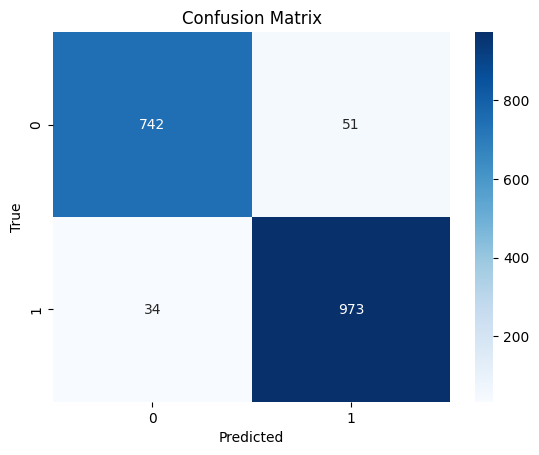

In [26]:
# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Proses ini memberikan evaluasi yang komprehensif tentang performa model klasifikasi Random Forest.
* Model klasifikasi memiliki performa yang sangat baik, dengan precision, recall, dan f1-score yang tinggi untuk kedua kelas (0 dan 1).
* Dengan akurasi keseluruhan 95%, model menunjukkan kemampuan yang sangat baik dalam memprediksi kelas dengan benar.
* Keduanya, macro average dan weighted average, menunjukkan nilai metrik yang konsisten, mengindikasikan bahwa model tidak hanya bagus dalam menangani kelas yang lebih besar tetapi juga kelas yang lebih kecil.
* Secara keseluruhan, hasil ini menunjukkan bahwa model telah dilatih dengan baik dan mampu generalisasi dengan baik pada data uji.

Model Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       793
           1       0.85      0.88      0.87      1007

    accuracy                           0.85      1800
   macro avg       0.85      0.85      0.85      1800
weighted avg       0.85      0.85      0.85      1800



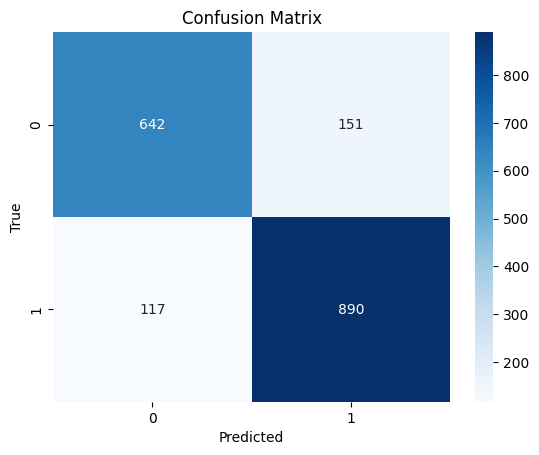

In [27]:
# Evaluate the model
# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_log))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Proses ini memberikan evaluasi yang komprehensif tentang performa model klasifikasi Logistic Regression.
* Model klasifikasi menunjukkan performa yang baik dengan akurasi 85%, dan metrik precision, recall, serta f1-score yang konsisten untuk kedua kelas.
* Keduanya, macro dan weighted average, menunjukkan nilai metrik yang sama, mengindikasikan bahwa model tidak hanya berhasil dalam menangani kelas yang lebih besar tetapi juga memiliki kinerja yang baik pada kelas yang lebih kecil.
* Secara keseluruhan, hasil ini menunjukkan bahwa model dilatih dengan baik dan mampu memberikan prediksi yang akurat dan dapat diandalkan pada data uji.

Perbandingan Accuracy dan Nilai MSE Kedua Model

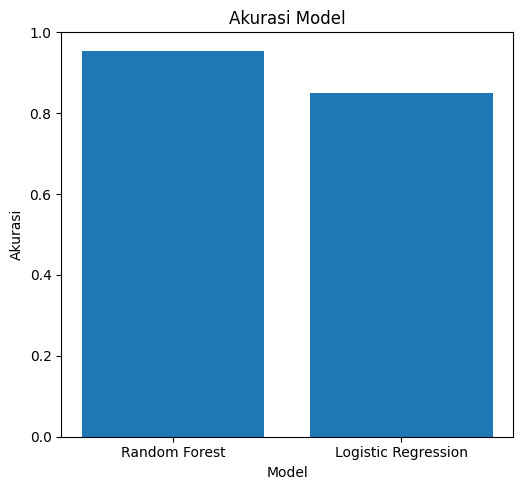

In [29]:
# Tampilkan hasil dalam bentuk bar plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['Random Forest', 'Logistic Regression'], [accuracy_rf, accuracy_log])
plt.title('Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

Grafik diatas adalah visualisasi terhadap performa kedua model. Dari penjelasan dan kesimpulan hasil akurasi dan evaluasi kedua model, **model Random Forest memiliki performa yang lebih tinggi dan akurat** dibandingkan dengan performa model Logistic Regression.